In [ ]:
from edges.filters import xrfi
from edges import modeling as mdl
import numpy as np
import matplotlib.pyplot as plt
import logging

In [2]:
logging.basicConfig(level=logging.INFO)

In [3]:
freqs = np.linspace(50, 150, 1000)

In [4]:
sky_pl_1d = 1750 * (freqs  / 75.0) ** -2.5

In [5]:
rfi = np.zeros_like(freqs)
rfi[50::50] = 1

In [6]:
sky = sky_pl_1d + np.random.normal(0, scale=sky_pl_1d / 1000, size=freqs.shape) + sky_pl_1d.max()/5 * rfi

In [7]:
epoly = mdl.EdgesPoly(n_terms=5)

In [8]:
model = epoly.fit(freqs, sky).evaluate()

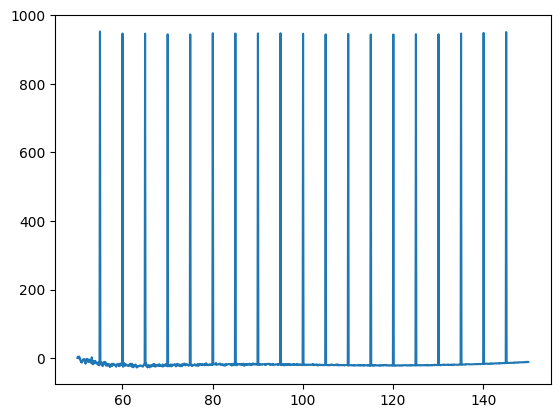

In [9]:
plt.plot(freqs, sky - model)

In [79]:
sky = np.load("data.npy")

In [80]:
data_modeler = xrfi.MedianFilterModeler(size=32)
std_modeler = xrfi.FilterModeler.gaussian(size=32)

In [81]:
true_weights = np.ones_like(sky)
true_weights[50::50] = 0

In [82]:
mm = data_modeler.get_model(None, data=sky, weights=np.ones_like(sky))
resid = sky -mm 

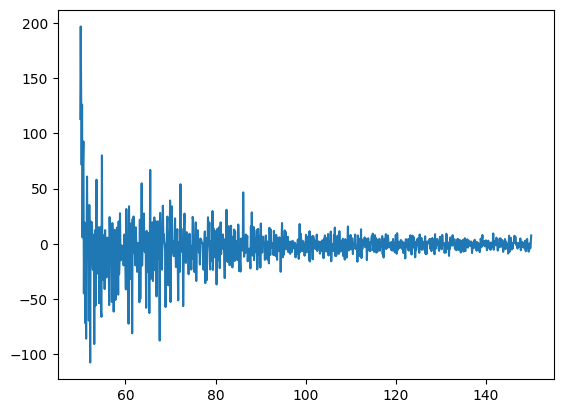

In [83]:
plt.plot(freqs, resid)

In [84]:
np.any(np.isnan(resid))

np.False_

In [85]:
#mcls = std_modeler.init_model({'nterms': 5}, freqs)
std = std_modeler.get_std(None, resids=resid, weights=np.ones_like(sky))

C:\Users\steve\Documents\work\edges\edges-analysis\src\edges\filters\xrfi.py:94: RuntimeWarning: divide by zero encountered in log
  smooth_rsq = self.get_model(model, np.log(resids**2), weights)


In [88]:
np.any(np.isnan(std)), np.min(np.abs(resid)), np.max(np.abs(resid))

(np.False_, np.float64(0.0), np.float64(196.75509728545148))

C:\Users\steve\AppData\Local\Temp\ipykernel_59980\1957263148.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(freqs[-150:], np.log(resid[-150:]**2))


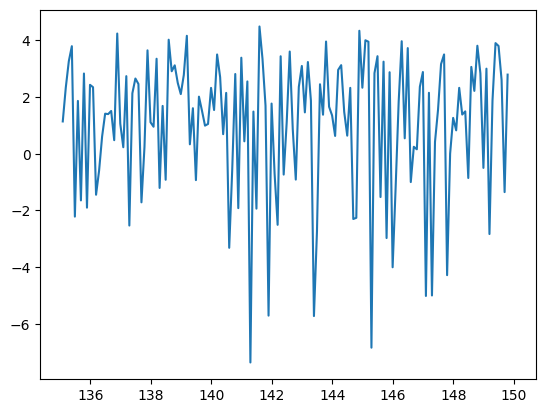

In [93]:
plt.plot(freqs[-150:], np.log(resid[-150:]**2))

In [94]:
from astropy.convolution import convolve

In [ ]:
np.log(resid[-150:]**2)

C:\Users\steve\AppData\Local\Temp\ipykernel_59980\1288052676.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(resid[-150:]**2)


array([ 1.13852531e+00,  2.33734104e+00,  3.26478943e+00,  3.79343272e+00,
       -2.21907724e+00,  1.86270370e+00, -1.64681009e+00,  2.82983872e+00,
       -1.90285961e+00,  2.43050366e+00,  2.34686234e+00, -1.44717790e+00,
       -5.99971262e-01,  6.08649635e-01,  1.41226490e+00,  1.39765267e+00,
        1.50809066e+00,  4.77493334e-01,  4.23992008e+00,  1.06078711e+00,
        2.28793910e-01,  2.73668770e+00, -2.53372299e+00,  2.13296180e+00,
        2.65297252e+00,  2.46035974e+00, -1.71527445e+00,  2.38424393e-01,
        3.64702708e+00,  1.10930224e+00,  9.51976032e-01,  3.35088783e+00,
       -1.20722789e+00,  1.68655220e+00, -9.18714768e-01,  4.02231826e+00,
        2.90936308e+00,  3.11828952e+00,  2.49709986e+00,  2.10318288e+00,
        2.78015797e+00,  4.16036399e+00,  3.31880599e-01,  1.60555795e+00,
       -9.31437850e-01,  2.01316924e+00,  1.51894151e+00,  9.91135054e-01,
        1.04919957e+00,  2.32296681e+00,  1.54209534e+00,  3.50136362e+00,
        2.70329328e+00,  

: 

In [96]:
convolve(np.log(resid[-150:]**2), std_modeler.kernel, boundary='extend', normalize_kernel=True)

C:\Users\steve\AppData\Local\Temp\ipykernel_59980\2737694593.py:1: RuntimeWarning: divide by zero encountered in log
  convolve(np.log(resid[-150:]**2), std_modeler.kernel, boundary='extend', normalize_kernel=True)


array([1.18025568, 1.18128179, 1.18226773, 1.18321575, 1.18411066,
       1.18495049, 1.18571899, 1.18643495, 1.18707428, 1.18764057,
       1.18811776, 1.18848935, 1.18877599, 1.18893435, 1.18899937,
       1.18895629, 1.18879164, 1.18849541, 1.18805024, 1.18748293,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -

(0.0, 200.0)

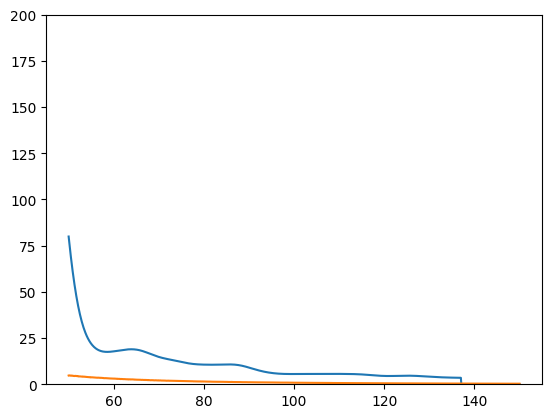

In [89]:
plt.plot(freqs, std)
#plt.plot(freqs, np.abs(resid))
plt.plot(freqs, sky / 1000)
plt.ylim(0, 200)

In [90]:
std[-10:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
np.abs(resid).min(), np.abs(resid).max()

(np.float64(0.00033288468284808914), np.float64(964.9790199837491))

In [27]:
std.min(), std.max()

(np.float64(0.25457460280115196), np.float64(67.15734126012585))

In [15]:
resid = sky - mm

In [17]:
(resid / std).max()

np.float64(832.3296046828992)